In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Specify the file path
ratings_file_path = './ml-1m/ratings.dat'

# Read the .dat file with the specified delimiter
ratings_df = pd.read_csv(ratings_file_path, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Display the DataFrame
print(ratings_df)

/tmp/ipykernel_3817/1316270741.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv(ratings_file_path, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])


         UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]


In [4]:
unique_movies = []
count = 0
for index,row in ratings_df.iterrows():
    movieID = row['MovieID']
    if movieID not in unique_movies:
        count += 1
        unique_movies.append(movieID)

print(count)

3706


In [5]:
movies_file_path = './ml-1m/movies.dat'
movies_df = pd.read_csv(movies_file_path, delimiter='::', header=None, names=['MovieID', 'Title', 'Genre'],encoding='latin1')

# Display the DataFrame
print(movies_df.head)


<bound method NDFrame.head of       MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                             Genre  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  


/tmp/ipykernel_3817/2616853509.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv(movies_file_path, delimiter='::', header=None, names=['MovieID', 'Title', 'Genre'],encoding='latin1')


Exploratory Data Analysis

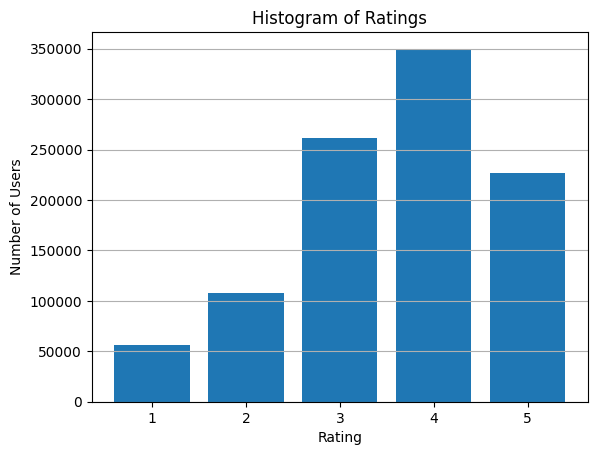

In [6]:
import pandas as pd




# Assuming df_ratings is your DataFrame containing ratings data
# Replace 'rating' with the actual column name containing ratings
ratings_counts = ratings_df['Rating'].value_counts()

# Plot the histogram
plt.bar(ratings_counts.index, ratings_counts.values)
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Histogram of Ratings')
plt.xticks(range(1, 6))  # Assuming ratings are integers from 1 to 5
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

In [7]:
def get_movies_for_user(userID,rating_df):
    row_list = rating_df[rating_df['UserID'] == userID]
    movie_list = []
    for row in row_list:
        movie_list.append(row['MovieID'])
    return movie_list

Genres

In [8]:
max_movieID = int(movies_df['MovieID'].max())
max_userID = int(ratings_df['UserID'].max())
print (max_movieID, max_userID)

3952 6040


In [9]:
max_movieID = int(movies_df['MovieID'].max())
max_userID = int(ratings_df['UserID'].max())
print (max_movieID, max_userID)

3952 6040


In [10]:
movie_genres = []
for i in range (max_movieID + 1):
  movie_genres.append ([])

for index, row in movies_df.iterrows():
  genres_str = row['Genre']
  genres_list = genres_str.split('|')
  movie_genres[row['MovieID']] = (genres_list)

In [11]:
columns = ["Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]

In [12]:
user_ratings = []
for i in range (max_userID + 1):
  user_ratings.append ([])

for index, row in ratings_df.iterrows():
  userid = int(row["UserID"])
  movieid = int(row["MovieID"])
  rating = int(row["Rating"])
  user_ratings[userid].append ((movieid, rating))

In [13]:
genre_index = {column: index for index, column in enumerate(columns)}
print(genre_index) 

{'Action': 0, 'Adventure': 1, 'Animation': 2, "Children's": 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Fantasy': 8, 'Film-Noir': 9, 'Horror': 10, 'Musical': 11, 'Mystery': 12, 'Romance': 13, 'Sci-Fi': 14, 'Thriller': 15, 'War': 16, 'Western': 17}


In [14]:
user_genre_ratings_df = pd.DataFrame(columns=['UserID']+columns)
for userid in range (1, max_userID + 1):
  sum_ratings = np.zeros (len(columns))
  cnt_ratings = np.zeros (len(columns))

  for index, pair in enumerate (user_ratings[userid]):
    movieid = pair[0]
    rating = pair[1]

    for genre in movie_genres[movieid]:
      sum_ratings[genre_index[genre]] = np.add (sum_ratings[genre_index[genre]], rating)
      cnt_ratings[genre_index[genre]] = np.add (cnt_ratings[genre_index[genre]], 1)

  cur_genre_ratings = [userid]
  for i in range (len(columns)):
    if (cnt_ratings[i] > 0):
      cur_genre_ratings.append (np.divide (sum_ratings[i], cnt_ratings[i]))
    else:
      cur_genre_ratings.append (np.nan)

  
  user_genre_ratings_df.loc[len(user_genre_ratings_df)] = cur_genre_ratings

In [15]:
user_genre_ratings_df

,UserID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.00,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
1,2.0,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.00,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
2,3.0,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.50,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
3,4.0,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.50,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000
4,5.0,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036.0,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.00,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6036,6037.0,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.25,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6037,6038.0,3.000000,4.000000,3.666667,3.000000,3.833333,NaN,NaN,3.888889,NaN,NaN,2.500000,NaN,NaN,4.166667,4.000000,NaN,4.000000,NaN
6038,6039.0,4.000000,4.100000,3.615385,3.529412,3.723077,4.000000,NaN,4.000000,3.60,4.500000,4.000000,3.690476,4.176471,3.800000,4.250000,4.142857,4.111111,4.500000


In [16]:
# Calculate null percentages for each row
null_percentages_per_row = (user_genre_ratings_df.isnull().mean(axis=1) * 100).round(2)

# Display null percentages for each row
print(null_percentages_per_row[null_percentages_per_row > 0])

0       26.32
1       21.05
2       15.79
3       31.58
4        5.26
        ...  
6032    15.79
6033    31.58
6034     5.26
6037    42.11
6038     5.26
Length: 4611, dtype: float64


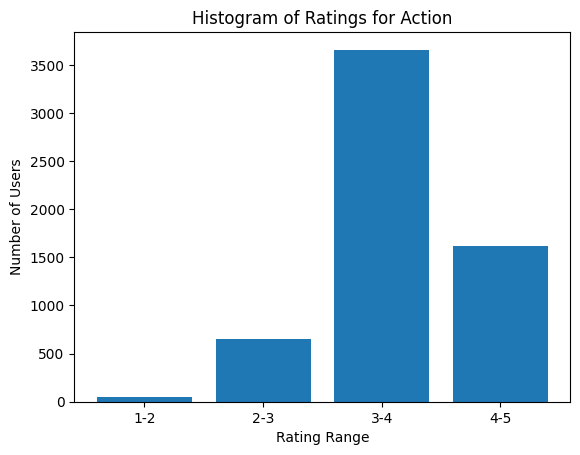

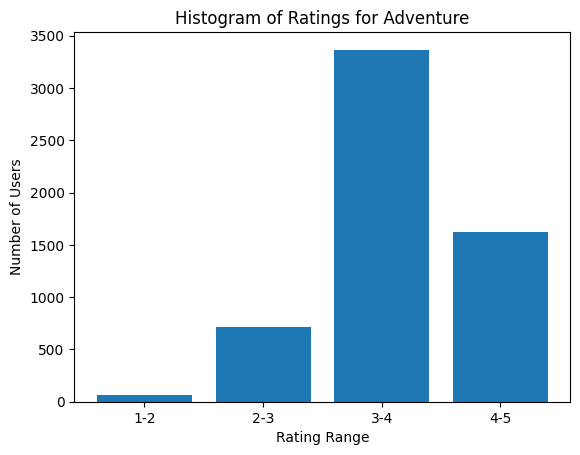

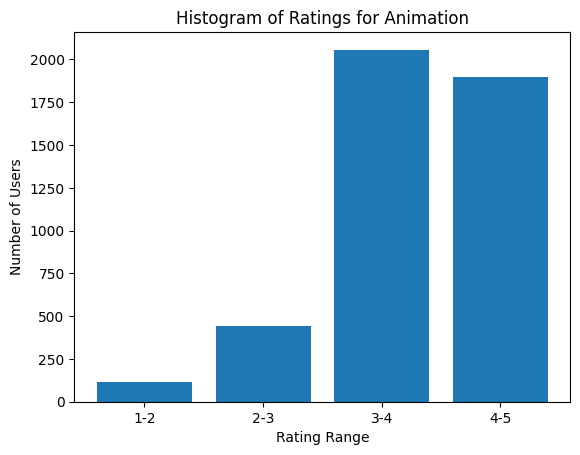

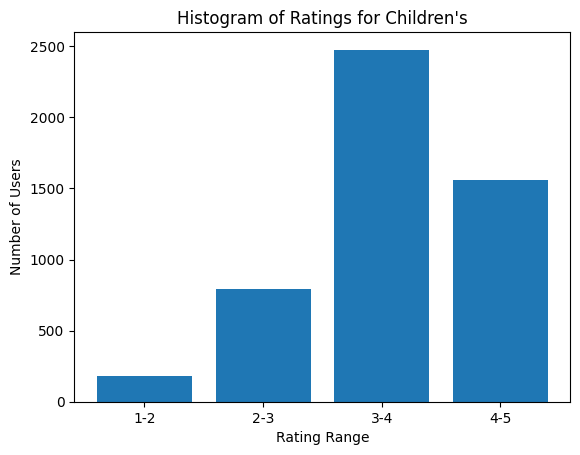

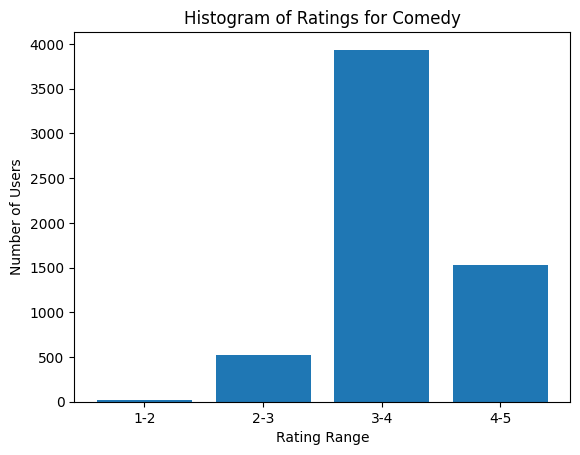

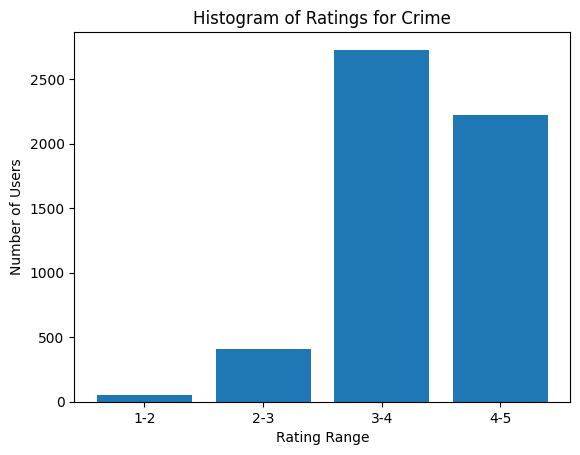

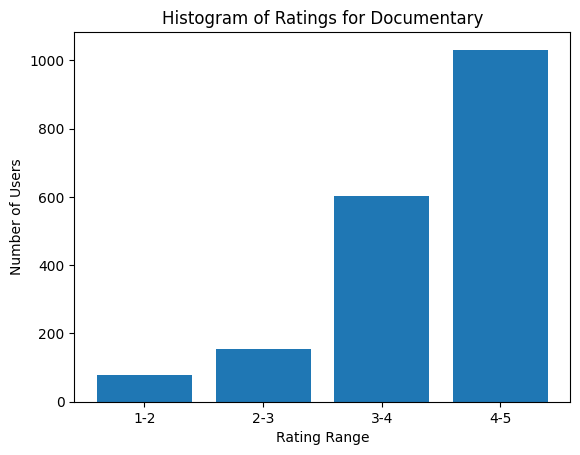

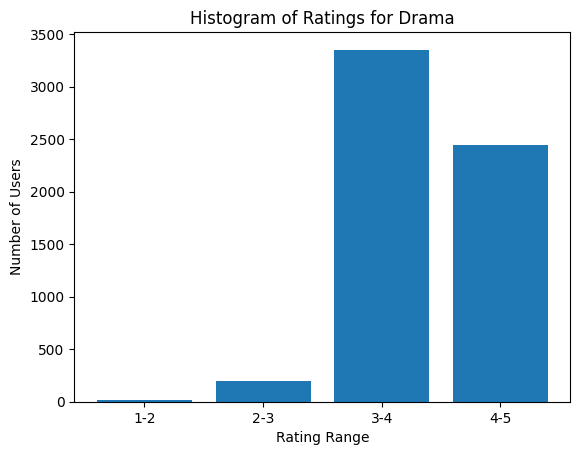

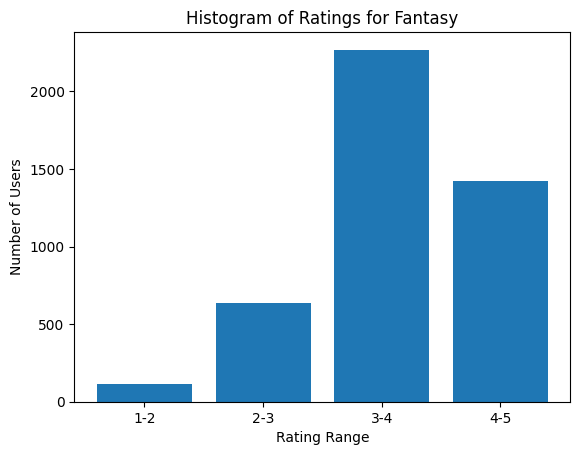

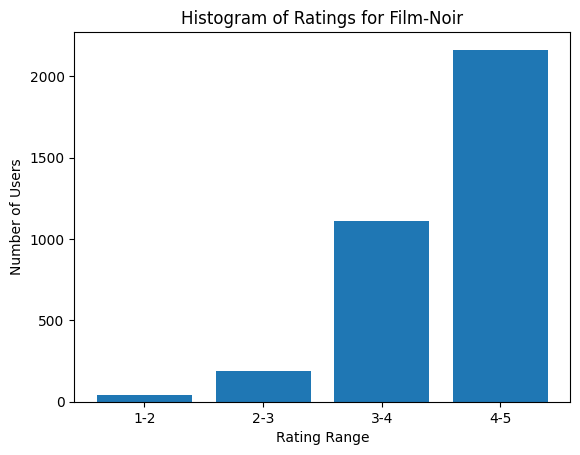

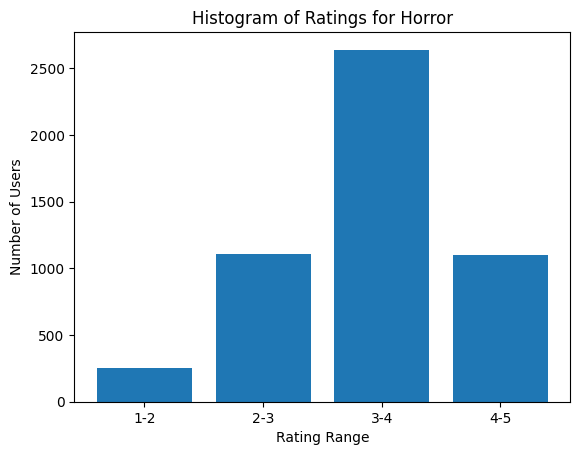

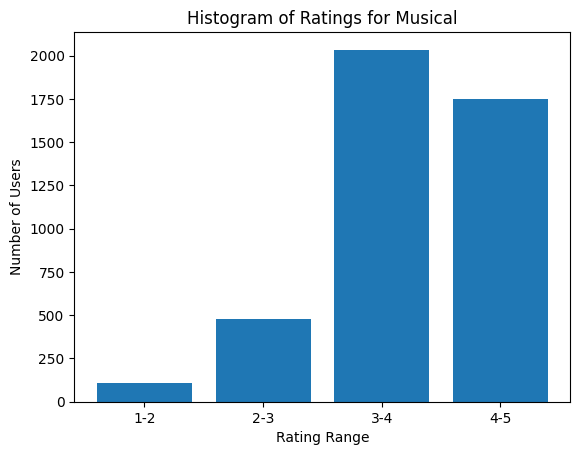

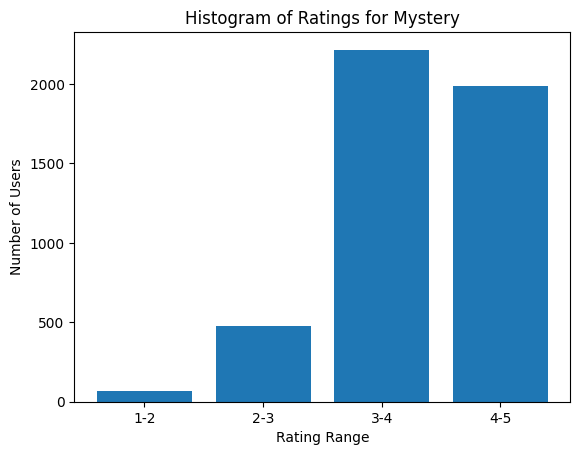

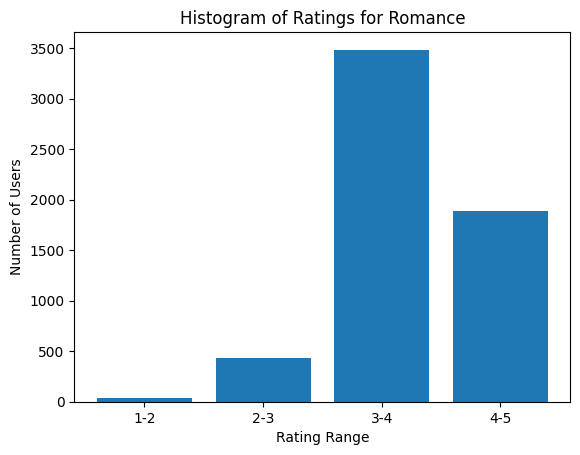

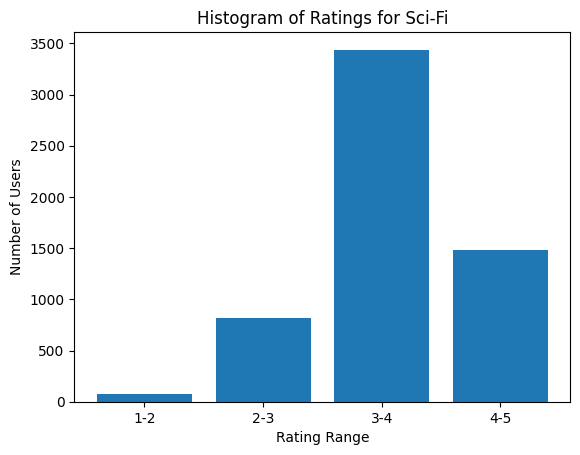

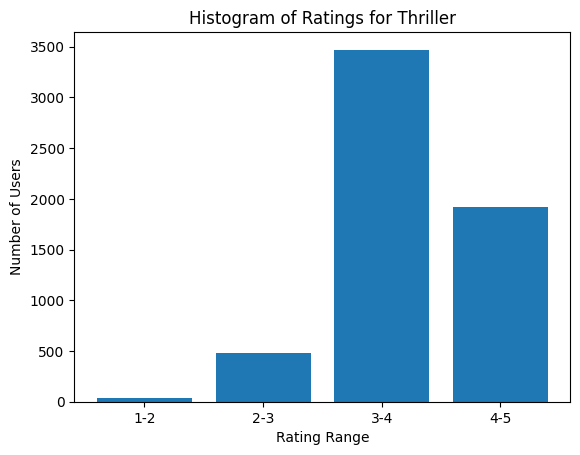

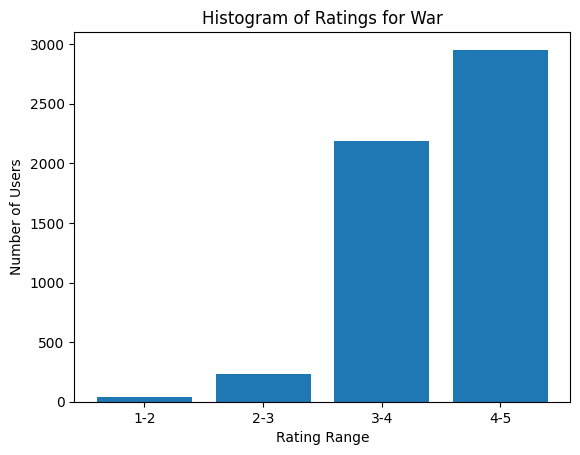

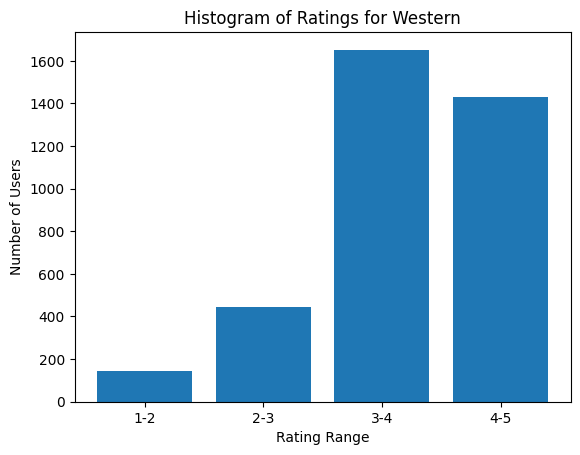

In [94]:
# Assuming df is your DataFrame with user ratings for each genre
# Replace 'Genre1', 'Genre2', ... with the actual column names representing genres

# Define the rating ranges
rating_ranges = [(1, 2), (2, 3), (3, 4), (4, 5)]

# Iterate over each genre column
for genre in user_genre_ratings_df.columns[1:]:
    # Extract the rating data for the genre
    genre_ratings = user_genre_ratings_df[genre]
    
    # Initialize a dictionary to store the counts for each rating range
    rating_counts = {range_: 0 for range_ in rating_ranges}
    
    # Count the number of users who rated within each range
    for rating in genre_ratings:
        for range_ in rating_ranges:
            if range_[0] <= rating < range_[1]:
                rating_counts[range_] += 1
    
    # Plot the histogram for the genre
    plt.bar(range(len(rating_ranges)), rating_counts.values(), align='center')
    plt.xlabel('Rating Range')
    plt.ylabel('Number of Users')
    plt.title(f'Histogram of Ratings for {genre}')
    plt.xticks(range(len(rating_ranges)), [f'{range_[0]}-{range_[1]}' for range_ in rating_ranges])
    plt.show()

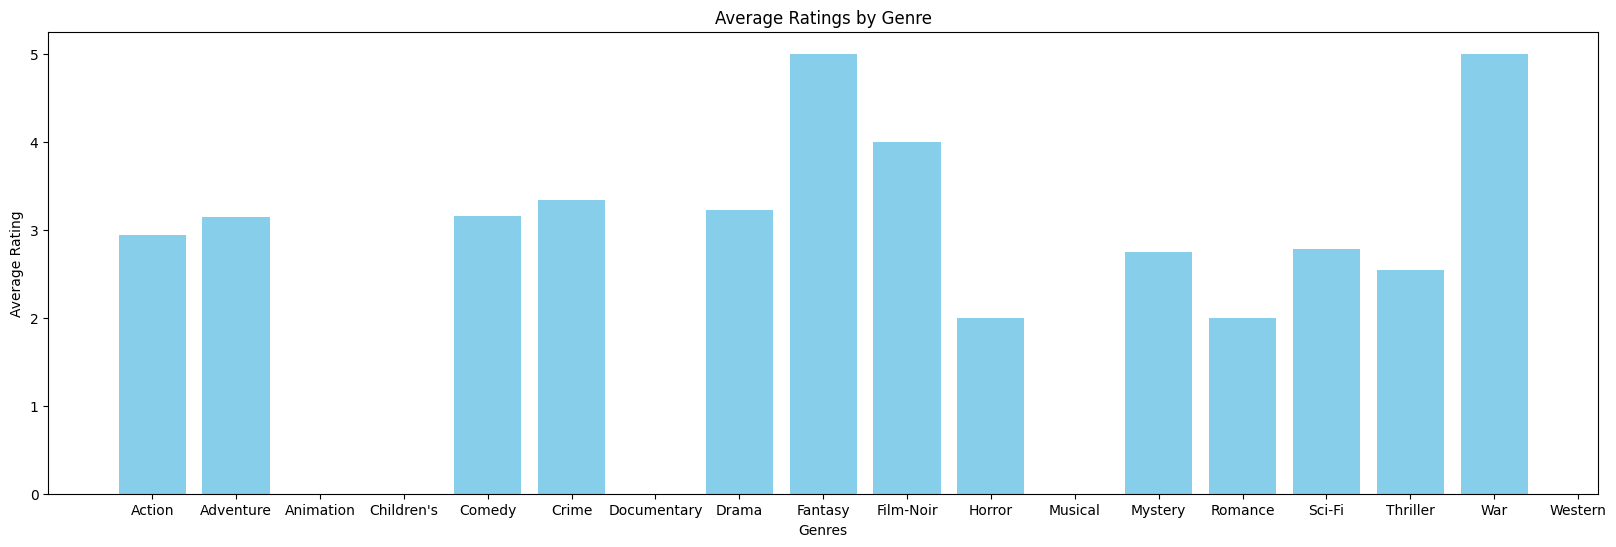

In [41]:
def plotAverageGenreRating(userID, user_genre_matrix):
    # Exclude the 'UserID' column
    user_row = np.array(user_genre_matrix[user_genre_matrix['UserID'] == userID])[0][1:]
    # Calculate mean rating
    mean = np.nanmean(user_row)
    # avg_rating = avg_rating - mean
    # print(avg_rating)
    # Create DataFrame for plotting
    df = pd.DataFrame({'Genre': user_genre_matrix.columns[1:], 'Average Rating': user_row})

    plt.figure(figsize=(20, 6))
    # Plotting the bar plot
    plt.bar(df['Genre'], df['Average Rating'], color='skyblue')

    # Adding labels and title
    plt.xlabel('Genres')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings by Genre')

    # Show the plot
    plt.show()


plotAverageGenreRating(1006,user_genre_ratings_df)

In [17]:
def mean_user_rating(user_genre_ratings_matrix):
    row_means = user_genre_ratings_matrix.mean(axis=1)

User movie rating matrix

In [18]:
def create_user_movie_rating_matrix(ratings_df):
    # Create a user-movie matrix using pivot_table
    user_movie_matrix = pd.pivot_table(ratings_df, values='Rating', index='UserID', columns='MovieID')

    # Fill NaN values with 0
    # user_movie_matrix = user_movie_matrix.fillna(0)

    return user_movie_matrix

In [19]:
user_movie_matrix = create_user_movie_rating_matrix(ratings_df)

print(user_movie_matrix)
print(user_movie_matrix.loc[1,1193])

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      NaN   NaN   NaN   2.0   NaN   3.0   NaN   NaN   NaN   NaN  ...   
6037      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6038      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6039      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6040      3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

MovieID  39

In [20]:
def watched_movies(userID,user_movie_matrix):
    user_ratings = user_movie_matrix.loc[userID].dropna()
    return user_ratings.to_dict()

In [21]:
def watched_movie_ratings(userID,user_movie_matrix):
    return user_movie_matrix.loc[userID].dropna()

1
296
2077
701


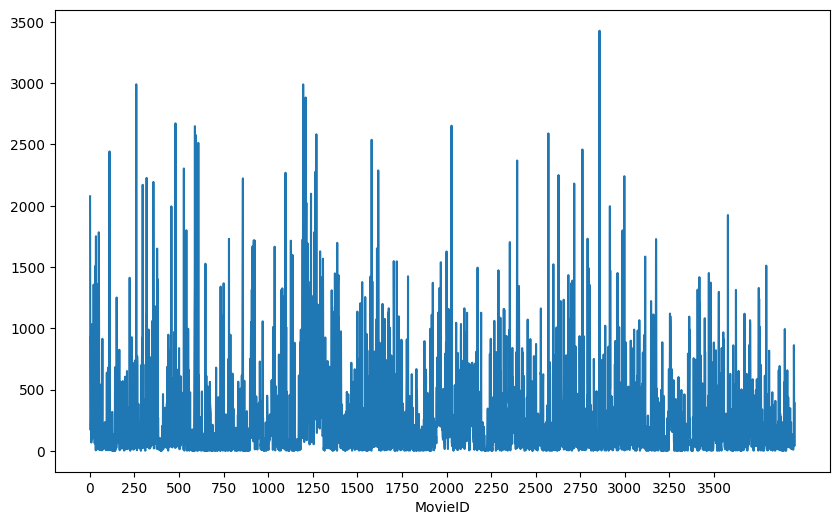

Mean of non-null entries in each column: 269.88909875876953
Median of non-null entries in each column: 123.5


In [22]:
import matplotlib.pyplot as plt

# Calculate the number of non-null entries in each column
non_null_counts = user_movie_matrix.notnull().sum()

print(non_null_counts[3382])
print(non_null_counts[5])
print(non_null_counts[1])
print(non_null_counts[2])

# Calculate the mean of non-null entries for each column
mean_non_null = non_null_counts.mean()

median_non_null = non_null_counts.median()

max_non_null = non_null_counts.max()

plt.figure(figsize = (10, 6))
non_null_counts.plot()
plt.xticks(range(0, len(non_null_counts), 250), [i*250 for i in range(len(non_null_counts)//250 + 1)])

plt.show()

print("Mean of non-null entries in each column:", mean_non_null)
print("Median of non-null entries in each column:", median_non_null)

In [23]:
movieWeights = {}  #dictionary    #processing offline for more efficient online computation
def findMovieWeights(df):
    for column_name in df.columns:
        movieWeights[column_name] =  np.log(df.shape[0]/df[column_name].count()) / np.log(2)

findMovieWeights(user_movie_matrix)

In [61]:
popMovieWeights = {}
def findPopMovieWeights(df):
    sigma = 150   #variance for the Guassian 
    for column_name in df.columns:

        # popMovieWeights[column_name] = np.exp(-((non_null_counts[column_name] - mean_non_null) ** 2) / (2 * sigma ** 2))    #uncomment this to find the difference with mean 
        popMovieWeights[column_name] = np.exp(-((non_null_counts[column_name] - median_non_null) ** 2) / (2 * sigma ** 2))    #uncomment this to find the difference with median 

findPopMovieWeights(user_movie_matrix)
print(popMovieWeights)
print(popMovieWeights[3382])

{1: 1.4800011802236843e-37, 2: 0.0006044147037595555, 3: 0.06125730188448402, 4: 0.9530861315795482, 5: 0.5162056739454963, 6: 3.6808980659540455e-07, 7: 0.08320482001170693, 8: 0.9338401509437892, 9: 0.9897803568637765, 10: 2.287604047567944e-06, 11: 1.0394328089757094e-08, 12: 0.9708283959018524, 13: 0.9867496798493023, 14: 0.9808469077946759, 15: 0.9888130446112331, 16: 0.0009764318935429924, 17: 1.301242932237699e-05, 18: 0.975369516121952, 19: 0.20878505525175556, 20: 0.9708283959018524, 21: 2.1857758363215382e-15, 22: 0.2370844460440882, 23: 0.9998611207557263, 24: 0.0038231819869519183, 25: 8.319737833602703e-08, 26: 0.9878027743917152, 27: 0.9168553557320289, 28: 0.9338401509437892, 29: 0.1762229092378792, 30: 0.9470058579669858, 31: 0.9932175497930307, 32: 2.632323106842264e-19, 33: 0.7280839737434496, 34: 2.734537774754655e-26, 35: 0.9383750633716705, 36: 5.671328699008112e-07, 37: 0.7434527989747526, 38: 0.8165458431481859, 39: 1.57224443148869e-15, 40: 0.8234337167993159, 4

Similarity functions

In [25]:
def similarity(new_user_ratings,user_ratings, user_mean, new_user_mean):   #assuming input as Series objects

    if(len(new_user_ratings) == 0):
        return 0


    # print(type(new_user_ratings))
    # new_user_mean = new_user_ratings.mean()
    # user_mean = user_ratings.mean()

    new_user_ratings -= new_user_mean
    user_ratings -= user_mean

    num = np.dot(new_user_ratings, user_ratings)

    new_user_ratings_square = new_user_ratings**2
    user_ratings_square = user_ratings**2

    term1 = np.sqrt(np.sum(new_user_ratings_square))
    term2 = np.sqrt(np.sum(user_ratings_square))



    if term1 == 0 and term2 == 0:
        return 1
    elif term1 == 0 or term2 == 0:
        return 0

    return num/(term1*term2)

In [62]:
def weighted_similarity(new_user_ratings,user_ratings,movieIDs, user_mean, new_user_mean):   #assuming input as Series objects
    # print(type(new_user_ratings))

    if(len(new_user_ratings) == 0):
        return 0

    # new_user_mean = new_user_ratings.mean()
    # user_mean = user_ratings.mean()

    np_new_user_ratings = new_user_ratings.values
    np_user_ratings = user_ratings.values

    new_user_ratings -= new_user_mean
    user_ratings -= user_mean

    # weights = [movieWeights[key] for key in movieIDs]
    weights = [popMovieWeights[key] for key in movieIDs]


    num = sum(x * y * z for x, y, z in zip(weights, user_ratings, new_user_ratings))

    new_user_ratings_square = new_user_ratings**2
    user_ratings_square = user_ratings**2

    term1 = np.sqrt(np.dot(new_user_ratings_square,weights))
    term2 = np.sqrt(np.dot(user_ratings_square,weights))

    if term1 == 0 and term2 == 0:
        return 1
    elif term1 == 0 or term2 == 0:
        return 0

    return num/(term1*term2)

In [27]:
def watched_movies_intersection(user1_movies,user2_movies):
    # np_user1_movies = user1_movies.values
    # np_user2_movies = user2_movies.values

    np_user1_movies = np.array(list(user1_movies))
    np_user2_movies = np.array(list(user2_movies))

    return np.intersect1d(np_user1_movies,np_user2_movies)

In [28]:
def users_who_watched_movie(movieID,user_movie_matrix):
    user_list = []
    for index,row in user_movie_matrix.iterrows():
        if pd.notna(row[movieID]):
            user_list.append(index)
    return user_list

In [29]:
users_who_watched_movie = []
for i in range (max_movieID + 1):
  users_who_watched_movie.append ([])

for index,row in user_movie_matrix.iterrows():
  for movie_id, rating in row.items():
    if (pd.notna (rating)):
      users_who_watched_movie[movie_id].append (index)

Finding new ratings

In [68]:
def new_rating(movieID,new_movie_ratings,user_movie_matrix):   #movieID:int, new_movie_ratings : dictionary, user_movie_matrix : dataframe
    np_new_movie_ratings = np.array(list(new_movie_ratings.values()))
    new_mean = np.mean(np_new_movie_ratings)
    # print(new_mean)
    # print("users who watched movie")
    users = users_who_watched_movie[movieID]
    num = 0
    den = 0
    # print("Going to the for loop now")
    for userID in users:
        user_movie_ratings = watched_movies(userID,user_movie_matrix)

        np_user_movie_ratings = np.array(list(user_movie_ratings.values()))
        user_mean = np.mean(np_user_movie_ratings)
        
        common_movies = watched_movies_intersection(user_movie_ratings.keys(),new_movie_ratings.keys())
        common_user_movie_ratings = [user_movie_ratings[movie] for movie in common_movies]
        common_user_movie_ratings = pd.Series(common_user_movie_ratings)
        common_new_movie_ratings = [new_movie_ratings[movie] for movie in common_movies]
        common_new_movie_ratings = pd.Series(common_new_movie_ratings)
    

        # sim = weighted_similarity(common_user_movie_ratings,common_new_movie_ratings, common_movies, user_mean, new_mean)  #remove the comment to use weighted similarity
        sim = similarity(common_user_movie_ratings, common_new_movie_ratings, user_mean, new_mean)    #remove the comment to use normal Pearson's co-efficient

        num = num + sim*(user_movie_ratings[int(movieID)] - user_mean)
        den = den + abs(sim)

    # print("Out of for loop")
    if den == 0:
        return new_mean
    
    return new_mean + num/den

User Input

In [50]:
new_movie_ratings = {47:5,111:4,123:5,215:5,1196:4,296:5,318:5,541:5,924:5,1221:5,1237:4}
print(type(new_movie_ratings))

<class 'dict'>


In [69]:
new_ratings = []
new_movies = []
unwatched_movie_ratings = {}
for column in user_movie_matrix.columns:
    if column not in new_movie_ratings.keys():
        # print(column)
        # print(new_movie_ratings.keys())
        rating = new_rating(column, new_movie_ratings, user_movie_matrix)
        
        new_ratings.append(rating)
        new_movies.append(column)
        unwatched_movie_ratings[column] = rating

new_ratings.sort(reverse=True)
sorted_dict_desc = dict(sorted(unwatched_movie_ratings.items(), key=lambda item: item[1], reverse=True))
largest_keys = sorted(unwatched_movie_ratings, key=unwatched_movie_ratings.get, reverse=True)[:5]

print(largest_keys)

for i in range(5):
    print(new_ratings[i])
    # print(movie_title_from_ID(new_ratings[i],movies_df))

/tmp/ipykernel_3817/1770036895.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  common_user_movie_ratings = pd.Series(common_user_movie_ratings)
/tmp/ipykernel_3817/1770036895.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  common_new_movie_ratings = pd.Series(common_new_movie_ratings)


[3228, 3460, 1773, 1311, 1433]
7.366883116883117
7.058507975109077
7.005479116684684
6.995428673607208
6.978712266620136


In [70]:
def movie_id_to_title(movieID,movies_df):
    for index,row in movies_df.iterrows():
        if row['MovieID'] == movieID:
            return row['Title']

In [58]:
movie_avg_rating = [0 for _ in range (max_movieID + 1)]
movie_cnt_rating = [0 for _ in range (max_movieID + 1)]
user_avg_rating = [0 for _ in range (max_userID + 1)]
user_cnt_rating = [0 for _ in range (max_userID + 1)]

for index, row in ratings_df.iterrows():
  userid = int (row["UserID"])
  movieid = int(row["MovieID"])
  rating = int(row["Rating"])

  movie_avg_rating[movieid] += rating
  movie_cnt_rating[movieid] += 1

  user_avg_rating[userid] += rating
  user_cnt_rating[userid] += 1


for movieID in range (1, max_movieID + 1):
  if (movie_cnt_rating[movieID] == 0):
    continue
  movie_avg_rating[movieID] /= movie_cnt_rating[movieID]

for userID in range (1, max_userID + 1):
  if (user_cnt_rating[userID] == 0):
    continue
  user_avg_rating[userID] /= user_cnt_rating[userID]

In [71]:
def getFilmDetails (new_movie_ratings) :
  new_data_temp = [(k, v) for k, v in new_movie_ratings.items()]
  new_movie_ratings_df = pd.DataFrame(new_data_temp, columns = ['MovieID', 'Rating'])

  new_movie_genres = []
  new_movie_names = []
  new_movie_avg_rating = []
  new_movie_cnt_rating = []

  for (k, v) in new_movie_ratings.items():
    new_movie_genres.append (movie_genres[k])
    new_movie_names.append (movie_id_to_title (k, movies_df))
    new_movie_avg_rating.append (movie_avg_rating[k])
    new_movie_cnt_rating.append (movie_cnt_rating[k])

  new_movie_ratings_df['Name'] = new_movie_names
  new_movie_ratings_df['Genres'] = new_movie_genres


  return new_movie_ratings_df

In [72]:
getFilmDetails(new_movie_ratings)

,MovieID,Rating,Name,Genres
0,47,5,Seven (Se7en) (1995),"[Crime, Thriller]"
1,111,4,Taxi Driver (1976),"[Drama, Thriller]"
2,123,5,Chungking Express (1994),"[Drama, Mystery, Romance]"
3,215,5,Before Sunrise (1995),"[Drama, Romance]"
4,1196,4,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Drama, Sci-Fi, War]"
5,296,5,Pulp Fiction (1994),"[Crime, Drama]"
6,318,5,"Shawshank Redemption, The (1994)",[Drama]
7,541,5,Blade Runner (1982),"[Film-Noir, Sci-Fi]"
8,924,5,2001: A Space Odyssey (1968),"[Drama, Mystery, Sci-Fi, Thriller]"
9,1221,5,"Godfather: Part II, The (1974)","[Action, Crime, Drama]"


In [73]:
top_10_movies = dict(list(sorted_dict_desc.items())[:10])
getFilmDetails(top_10_movies)

,MovieID,Rating,Name,Genres
0,3228,7.366883,Wirey Spindell (1999),[Comedy]
1,3460,7.058508,Hillbillys in a Haunted House (1967),[Comedy]
2,1773,7.005479,Tokyo Fist (1995),"[Action, Drama]"
3,1311,6.995429,Santa with Muscles (1996),[Comedy]
4,1433,6.978712,"Machine, The (1994)","[Comedy, Horror]"
5,1165,6.973330,"Bloody Child, The (1996)","[Drama, Thriller]"
6,3651,6.973330,"Blood Spattered Bride, The (La Novia Ensangren...",[Horror]
7,3119,6.861562,Bay of Blood (Reazione a catena) (1971),[Horror]
8,2218,6.797585,Juno and Paycock (1930),[Drama]
9,3899,6.769259,Circus (2000),[Comedy]
